In [1]:
from termcolor import colored
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipywidgets

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier

%matplotlib inline
# sns.set_theme(style="darkgrid")

## Nlp EDA Testing

In [2]:
# nlp_df = pd.read_csv("datasets/twitter16m.csv", header=None, encoding='latin-1')
# nlp_df = nlp_df[[5,0]] # selecting only the tweets column and the sentiment
# nlp_df.columns = ["tweets","sentiment"]
# nlp_df.head()

nlp_df = pd.read_csv("datasets/womens_clothing_e-commerce_reviews.csv")
nlp_df = nlp_df[["Review Text", "Positive Feedback Count"]]
nlp_df.columns = ["review", "rating"]
nlp_df.head()

,review,rating
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,4
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,6


In [3]:
nlp_df.isnull().sum()

review    845
rating      0
dtype: int64

In [4]:
# eda = Nlpeda(nlp_df, "tweets", analyse="basic")

# eda = Nlpeda(nlp_df, "review", analyse="basic")
eda = Nlpeda(nlp_df, "review", analyse="ngram")

Dataframe contains 23486 rows and 2 columns


Null Information of Dataframe: 


,column_name,null_rows,null_percentage
0,review,845,3.597888


Please select to 'drop all null rows', to continue analysis of data.


interactive(children=(Checkbox(value=False, description='Drop all null rows'), Output()), _dom_classes=('widge…

In [5]:
eda.unigram_df

,unigram,frequence
0,dress,10567
1,love,8951
2,size,8772
3,fit,7325
4,like,7149
5,wear,6439
6,great,6117
7,just,5608
8,fabric,4798
9,small,4729


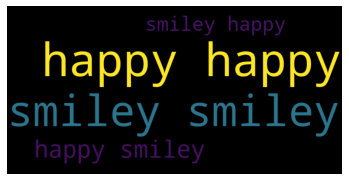

In [5]:
x = """happy happy happy happy happy happy happy happy happy happy
smiley smiley smiley smiley smiley smiley smiley smiley smiley smiley
happy happy happy happy happy happy happy happy happy happy
smiley smiley smiley smiley smiley smiley smiley smiley smiley smiley
happy happy happy happy happy happy happy happy happy happy
smiley smiley smiley smiley smiley smiley smiley smiley smiley smiley"""

from wordcloud import WordCloud
wc = WordCloud(width=800, height=400).generate(x)
plt.axis("off")
plt.imshow(wc)

In [4]:
data = { "examples": ["ALL UPPERCASE LETTERS","hi, i'd be happy with u", "hi my email is email@email.com",
                     "hi my website is https://google.com", "@special #characters with punctuations! ?",
                     "having   multiple   spaces", "<html>text under html tag</html>", "Áccěntěd těxt",
                     "I have many stop words, so try and remove me", "base form example: run ran running runs",
                      np.nan, "1234567890 is my number", "paris101 is the best" ]} 

df = pd.DataFrame(data, columns = ["examples"])
df

,examples
0,ALL UPPERCASE LETTERS
1,"hi, i'd be happy with u"
2,hi my email is email@email.com
3,hi my website is https://google.com
4,@special #characters with punctuations! ?
5,having multiple spaces
6,<html>text under html tag</html>
7,Áccěntěd těxt
8,"I have many stop words, so try and remove me"
9,base form example: run ran running runs


In [5]:
# pure = Nlpurifier(nlp_df, "tweets")
pure = Nlpurifier(df, "examples")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…

Button(description='Start Purifying', style=ButtonStyle())

Dataframe contains 13 rows and 1 columns

Dropping rows having [' ', 'NULL', numpy.nan] values
Total Null rows dropped: 1

Starting execution of 'lower' function
Finished execution of 'lower' function in 0.001 secs

Starting execution of 'contraction_to_expansion' function
Finished execution of 'contraction_to_expansion' function in 0.001 secs

Starting execution of 'count_emails' function
Finished execution of 'count_emails' function in 0.002 secs

Starting execution of 'count_urls' function
Finished execution of 'count_urls' function in 0.002 secs

Starting execution of 'get_word_count' function
type <obj>.word_count for getting word count series
Finished execution of 'get_word_count' function in 0.001 secs

Starting execution of 'remove_numbers' function
Finished execution of 'remove_numbers' function in 0.001 secs

Starting execution of 'remove_html_tags' function
Finished execution of 'remove_html_tags' function in 0.005 secs

Starting execution of 'remove_emails' function
Finishe

In [6]:
df

,examples
0,ALL UPPERCASE LETTERS
1,"hi, i'd be happy with u"
2,hi my email is email@email.com
3,hi my website is https://google.com
4,@special #characters with punctuations! ?
5,having multiple spaces
6,<html>text under html tag</html>
7,Áccěntěd těxt
8,"I have many stop words, so try and remove me"
9,base form example: run ran running runs


In [7]:
pure_df = pure.df
pure_df["original_examples"] = df["examples"]
cols = pure_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
pure_df = pure_df[cols]
pure_df

,original_examples,examples,emails,emails_counts,urls_counts
0,ALL UPPERCASE LETTERS,all uppercase letters,[],0,0
1,"hi, i'd be happy with u",hi i would be happy with u,[],0,0
2,hi my email is email@email.com,hi my email is,[email@email.com],1,0
3,hi my website is https://google.com,hi my website is,[],0,1
4,@special #characters with punctuations! ?,special characters with punctuations,[],0,0
5,having multiple spaces,having multiple spaces,[],0,0
6,<html>text under html tag</html>,text under html tag,[],0,0
7,Áccěntěd těxt,accented text,[],0,0
8,"I have many stop words, so try and remove me",i have many stop words so try and remove me,[],0,0
9,base form example: run ran running runs,base form example run ran running runs,[],0,0


## Test on real dataset

In [69]:
store_df = pd.read_csv("datasets/womens_clothing_e-commerce_reviews.csv")
store_df = store_df[["Review Text", "Positive Feedback Count"]]
store_df.columns = ["review", "rating"]
store_df.head()

,review,rating
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,4
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,6


In [70]:
store_df.shape

(23486, 2)

In [71]:
store_df["review"].isin([' ', 'NULL', np.nan]).sum()

845

In [72]:
store_df.dropna(inplace=True)
store_df.reset_index(drop=True, inplace=True)
store_df["review"].isin([' ', 'NULL', np.nan]).sum()

0

In [73]:
store_df.shape

(22641, 2)

In [74]:
store_df.iloc[90:100,:]

,review,rating
90,"I love cute summer dresses and this one, espec...",0
91,This top is so much prettier in real life than...,5
92,This shirt caught my eye because of how beauti...,3
93,"Purchased this top online, and when i received...",14
94,I usually wear a medium and bought a small. it...,0
95,I was very excited to order this top in red xs...,0
96,I am in need of easy comfortable tops for ever...,17
97,At first i wasn't sure about it. the neckline ...,0
98,I find that this brand can be a little bit all...,5
99,This top is absolutely stunning. i purchased t...,2


In [68]:
store_df.reset_index[90:]

TypeError: 'method' object is not subscriptable

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Checking termcolor

# print(colored("Hello World", "green"))
# print(colored("Hello World", "red"))
# print(colored("Hello World", "red",attrs=['bold']))
# print(colored("Hello World", "blue"))

In [8]:
# df = pd.read_csv("./datasets/SampleSuperstore.csv")
# df = pd.read_csv("./datasets/iris.csv")
# df = pd.read_csv("./datasets/Bengaluru_House_Data.csv")

Dataframe contains 150 rows and 5 columns

Sample of Dataframe:


,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
56,6.3,3.3,4.7,1.6,versicolor
143,6.8,3.2,5.9,2.3,virginica
118,7.7,2.6,6.9,2.3,virginica
36,5.5,3.5,1.3,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
121,5.6,2.8,4.9,2.0,virginica
26,5.0,3.4,1.6,0.4,setosa
58,6.6,2.9,4.6,1.3,versicolor
21,5.1,3.7,1.5,0.4,setosa



There are total 1 categorical and 4 numerical columns

Description of Data:



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Congrats!!, The Dataframe has NO NULL VALUES


Interactive Value Count Plot:



Output()


Joint Plot:



Output()


Correlation Heatmap Plot:



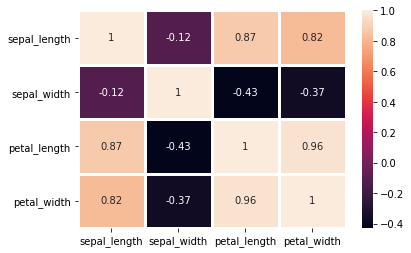

Pair Plot:



Output()


Pie Plot:



interactive(children=(Dropdown(description='Columns:', options=('species',), value='species'), Output()), _dom…

In [10]:
mleda = Mleda(df)
mleda

In [ ]:
# help(aa)
# print(MLeda.__doc__)
# print(help(MLeda))
# print(dir(MLeda))


In [ ]:
mleda.cat_cols

In [ ]:
mleda.num_cols

In [ ]:
# ae.sample(df)

In [ ]:
# For value count
# n = 10
# for col in df.columns:
#     print(df[col].value_counts().index.tolist()[:n])

## Widget Testing

In [ ]:
# Value Count Plot

# columns = df.columns
# column_dropdown = ipywidgets.Dropdown(options=columns,
#                                 value=columns[0],
#                                 description='Columns:',
#                                 disabled=False)

# top_columns = widgets.IntSlider(
#     value=5,
#     min=1,
#     max=35,
#     step=1,
#     description='Top Columns:',
#     disabled=False,
#     continuous_update=True,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d'
# )

# items = [column_dropdown, top_columns]
# value_count_ui = widgets.HBox(items)

# def value_counts_plot(column, n):
#     plt.figure(figsize=(10,5))
#     sns.barplot(x = df[column].value_counts().index.tolist()[:n], y = df[column].value_counts().tolist()[:n])
#     plt.xticks(rotation=75)
#     plt.ylabel("count")
#     plt.xlabel(column)
#     print("\nTop Columns with most common values are: ")
#     print(df[column].value_counts().index.tolist()[:n])

# out = widgets.interactive_output(value_counts_plot, {'column': column_dropdown, 'n': top_columns})

# display(value_count_ui, out)


In [ ]:
# Pie Plot
# cat_col = df.select_dtypes(include="O").columns.tolist()

# cat_column_dropdown = ipywidgets.Dropdown(options=cat_col,
#                                 value=cat_col[0],
#                                 description='Columns:',
#                                 disabled=False)
# def pie_plot(column):
#     plt.figure(figsize=(10,5))
#     df[column].value_counts().plot.pie(
#             autopct="%1.1f%%")

# ipywidgets.interact(pie_plot, column=cat_column_dropdown);

In [ ]:
# sns.pairplot(df, hue="Species")

In [ ]:
## Jointplot

# col = df.columns
# column_dropdown1 = ipywidgets.Dropdown(options=col,
#                                 value=col[0],
#                                 description='Columns:',
#                                 disabled=False)

# column_dropdown2 = ipywidgets.Dropdown(options=col,
#                                 value=col[0],
#                                 description='Columns:',
#                                 disabled=False)

# kind =  ["scatter","kde","hist","hex","reg","resid"]

# kind_dropdown = ipywidgets.Dropdown(options=kind,
#                                 value=kind[0],
#                                 description='Kind:',
#                                 disabled=False)

# items = [column_dropdown1, column_dropdown2, kind_dropdown]
# joint_plot_ui = widgets.HBox(items)

# def plot_joinplot(x,y,kind):
#     sns.jointplot(x=x, y=y,kind=kind, data=df)

# output = widgets.interactive_output(plot_joinplot, {'x': column_dropdown1, 'y': column_dropdown2, 'kind':kind_dropdown})

# display(joint_plot_ui, output)

In [ ]:
## Distribution plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = df.select_dtypes(include=numerics).columns

plt.figure(figsize=(16,14))
for i, col in enumerate(num_col,1):
    plt.subplot(3,3,i)
    sns.distplot(df[col], norm_hist= False)